# 01 - Set up the data

In this notebook, we demonstrate how to setup data packets that will then be used for the Bayesian analysis.

You will need to import the packages below. 

In [13]:
# Import packages

# The pyRaven package
import pyRaven as rav

# In this notebook, we are using the following packages
# for demonstrations 
import pandas as pd
import matplotlib.pyplot as plt
import h5py as h5

## Explanation of the structure of the meta-data for this example

For this example, let's assume that we have a sample of stars for which we would like to perform the bayesian analysis, and for each star there are a certain number of observations. 

There are three different types of information that the code needs
* Information that is linked to the star itself
* Information that is linked to each observations
* Information about the choice made for the bayesian analysis itself. 

During the data preparation, we will store the data (the LSD profiles) into a data structure (a python class) that will contain all of the above meta-information. These 'data packets' can be written to files in the h5 format, so that the meta-information is retained (more explanations below).

:::{margin} Accessible here
https://docs.google.com/spreadsheets/d/1fHcSEr-hUV-VQ1bH9DjDppJQvZ-K9PzX5DRjnpKPbUk/edit?usp=sharing
:::
We assumed that researcher will be likely to keep a database of stars and observations in a spreadsheet format, as these are very user-friendly, easily sharable, and easy to import in python through the Pandas package. Therefore for this example, we have prepared a Google spreadsheet which contains two spreadsheets: one with the information about the stars, and another with information about the observations.


:::{Note}
Note that this data setup steps could also be performed with different structures in place for storing the information e.g. ascii files, etc. and this process can be customize to suit your needs. Once the data is stored into the 'Data Packets', then all that is left is to setup loops in your prefered way to perform the analysis (the bayesian code will use the information stored in the meta-data). 
:::

In the cell below, we are demonstrating how to open these spreadsheet with Pandas

In [14]:
sheet_id = "1fHcSEr-hUV-VQ1bH9DjDppJQvZ-K9PzX5DRjnpKPbUk"
sheet_name = "Stars"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df_stars = pd.read_csv(url)

sheet_name = "Observations"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df_obs = pd.read_csv(url)

In [15]:
df_stars

,StarName,nobs,fitrange,vsini,vmac,logkappa,B_max,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,hd13745,3,268,100,NaN,NaN,5000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hd12345,2,100,100,NaN,NaN,5000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_obs

,StarName,obs,file,vrad,Ic,wint_data,wpol_data,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,hd13745,1,hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin,-24.10,1.00000,0.1,60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hd13745,2,hd13745_22aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin,-20.39,0.99970,0.1,60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hd13745,3,hd13745_23aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin,-17.91,0.99983,0.1,60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hd12345,1,some_file,0.00,1.00000,0.2,120,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hd12345,2,some_file,0.00,1.00000,0.2,120,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The way the data is organized in the two tables, we can find the rows in the observation spreadsheet that belongs to a specific star by doing something like:

In [17]:
df_obs.loc[df_obs["StarName"]=='hd13745']
import astropy.units as u

mask = df_obs["vrad"]>-10 *u.km

type(mask)
mask.head()

0    False
1    False
2    False
3     True
4     True
Name: vrad, dtype: bool

:::{tip}
Also, a very useful thing is how to loop over all of the stars, and then inside that loop, loop over all of the observations for that star, using the 'itertool' package:
:::

In [18]:
# iteration over all of the rows in the star dataframe
for i, star in df_stars.iterrows():
    # selecting the rows in the observation dataframe where the star name matches
    obs = df_obs.loc[df_obs["StarName"]==star["StarName"]]
    display(obs)
    # making a loop over all of the observations for that star, and printing the file
    for j, o in obs.iterrows():
        print(o["file"])

,StarName,obs,file,vrad,Ic,wint_data,wpol_data,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,hd13745,1,hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin,-24.10,1.00000,0.1,60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hd13745,2,hd13745_22aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin,-20.39,0.99970,0.1,60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hd13745,3,hd13745_23aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin,-17.91,0.99983,0.1,60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin
hd13745_22aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin
hd13745_23aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin


,StarName,obs,file,vrad,Ic,wint_data,wpol_data,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
3,hd12345,1,some_file,0.0,1.0,0.2,120,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hd12345,2,some_file,0.0,1.0,0.2,120,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


some_file
some_file


## Creating and saving a data packet

A <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> object is a collection of LSD profiles (for a given star) that will be analyzed together with Raven. More specifically, it will be a python list of `LSD` objects (from the [`specpolflow`](https://folsomcp.github.io/specpolFlow/) package). Usually, we will create a <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> object from the original LSD profiles. The object can be initialized directly with a list of LSD profiles (`lsds = LSDprof(list)`), but it will be more convinient most of the time to use the function that will create a LSDprof object from a list of filenames for .s format LSD profiles, as shown in the example below. The <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> class contains some functions to manipulate and plot an LSDprofs object

A <a href='../API/data.html#pyRaven.data.DataPacket'>`DataPacket`</a> object contains the following meta information:
* ***star_name:*** name of the star (string)
* ***nobs:*** the number of observations (an integer)
* ***obs_names:***: a list of strings containing the desired ID for the LSD profiles (could be the filenames, or an ID of your choice)
* ***vrad:***: a list of radial velocities for each observation
* ***Ic:*** a list of continnum normalization values for each observation
* the region used for fitting (a 2 element array) in the star's rest frame
* ***wint_data:*** a list of the intensity weigth that was used to calculate the LSD profiles used
* ***wpol_data:*** a list of the polariztion weigth that was used to calculate the LSD profiles used
* ***wint_rav:*** the unique intensity weigth that will be used to scale the LSD profile for pyRaven
* ***wpol_rav:*** the unique polarization weigth that will be used to scale the LSD profile for pyRaven

as well as 3 LDSprofs object that contains 3 different versions of the LSD profiles:
* ***original***: the LSDprof object containing the original LSD profiles (passed to the function at initialization)
* ***scaled***: the LSDprof object containing the LSD profiles that have been corrected for radial velocity, normalized to the continuum, and re-scaled to a common LSD weigth. This calculation is done during initialization, using the meta information provided
* ***cutfit***: the re-scaled LSD profiles that have been cut to only contain the velocity region to be fitted by pyRaven (for ease of computation). This calculation is done during initialization, using the meta information provided. 

Therefore, to access the velocity array of the scaled LSD profile for the second observation, it would look like this:
```packet.scaled.lsd[1].vel```

The <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> class has a write function that will save a <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> object to a h5 file, and a read function to read back that h5 file into a <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> object.

In the cell below, we do the following:

1. We extract the relevant rows for HD 13745 in the dataframes that we are using for this example
2. We create a LSDprof object for the original LSD profiles

In [19]:
# In the example dataset above, we have the information about the stars in Google spreadsheets, 
# loaded into Pandas dataframes. So we will use this here

# Star contains the row for HD 13745
star = df_stars.loc[df_stars["StarName"]=='hd13745']

# selecting the rows in the observation dataframe where the star name matches
obs = df_obs.loc[df_obs["StarName"]=='hd13745']
# the size of the dataframe gives us the number of observations. 
nobs = len(obs)

# Using a read function to create a LSDprof object with the original profiles
# creating an array of filenames from the file column in the dataframe
fnames = ['ExampleData/LSDProfiles/{}'.format(x) for x in obs['file'].tolist() ]
lsds_original = rav.data.read_lsds_from_sfiles(fnames)

The <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> class provides a function, <a href='../API/data.html#pyRaven.data.LSDprofs.plotI'>`plotI`</a>, as a quick way to overplot all of the LSD profiles in the <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> object (you need to define a figure and pass the method an existing matplotlib ax)

Text(0.5, 1.0, 'Original')

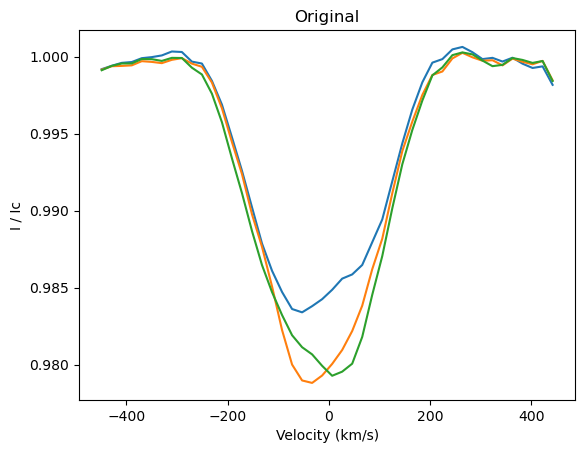

In [20]:
fig, ax = plt.subplots(1,1)
ax = lsds_original.plotI(ax)
ax.set_title('Original')

Now that we have our <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> object with the original LSD profiles, we can create a <a href='../API/data.html#pyRaven.data.DataPacket'>`DataPacket`</a> object with the <a href='../API/data.html#pyRaven.data.create_Packet'>`create_Packet`</a> function, with all of the necessary meta information. 

Here, we have some of the required meta data as columns in the spreadsheet -- so we will use that to create some of the arrays. 

If you need to determine e.g. the radial velocities or the continnum normalization, this is something that can be done by some utility functions of the <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> class, and then you can pass the result during the DataPacket creation (TODO!)

For more clarity in the example below, we create a variable for each of the item required to create a DataPacket -- of course in your own implementation you can pass e.g. columns of a dataframe directly. 

In [21]:
star_name = 'hd13745'
nobs = len(lsds_original.lsds)
fname = obs["file"].to_list()
vrad = obs["vrad"].to_numpy()
Ic = obs["Ic"].to_numpy()
wint_data = obs["wint_data"].to_numpy()
wpol_data = obs["wpol_data"].to_numpy()
wint_rav = 0.05
wpol_rav = 30.0
fitrange = float(star['fitrange'][0])
vsini = float(star['vsini'][0])

Packet = rav.data.create_Packet(star_name, nobs, fname, 
                    vrad, Ic, wint_data, wpol_data,
                    wint_rav, wpol_rav, fitrange, vsini,
                    lsds_original)

During the creation of a DataPacket, `Packet.original` is the original LSDprof object, and the `Packet.scaled` and `Packet.cutfit` <a href='../API/data.html#pyRaven.data.LSDprofs'>`LSDprofs`</a> objects are created from the meta information. 

The <a href='../API/data.html#pyRaven.data.DataPacket'>`DataPacket`</a> class provides a function, <a href='../API/data.html#pyRaven.data.DataPacket.plotI'>`plotI`</a>, that makes a diagnostic plot that shows the comparison between the 3 LSDprof objects, that you can check to make sure that the normalization, radial velocity shift, LSD weigth scaling, and the choice of fitting range are all correct. 

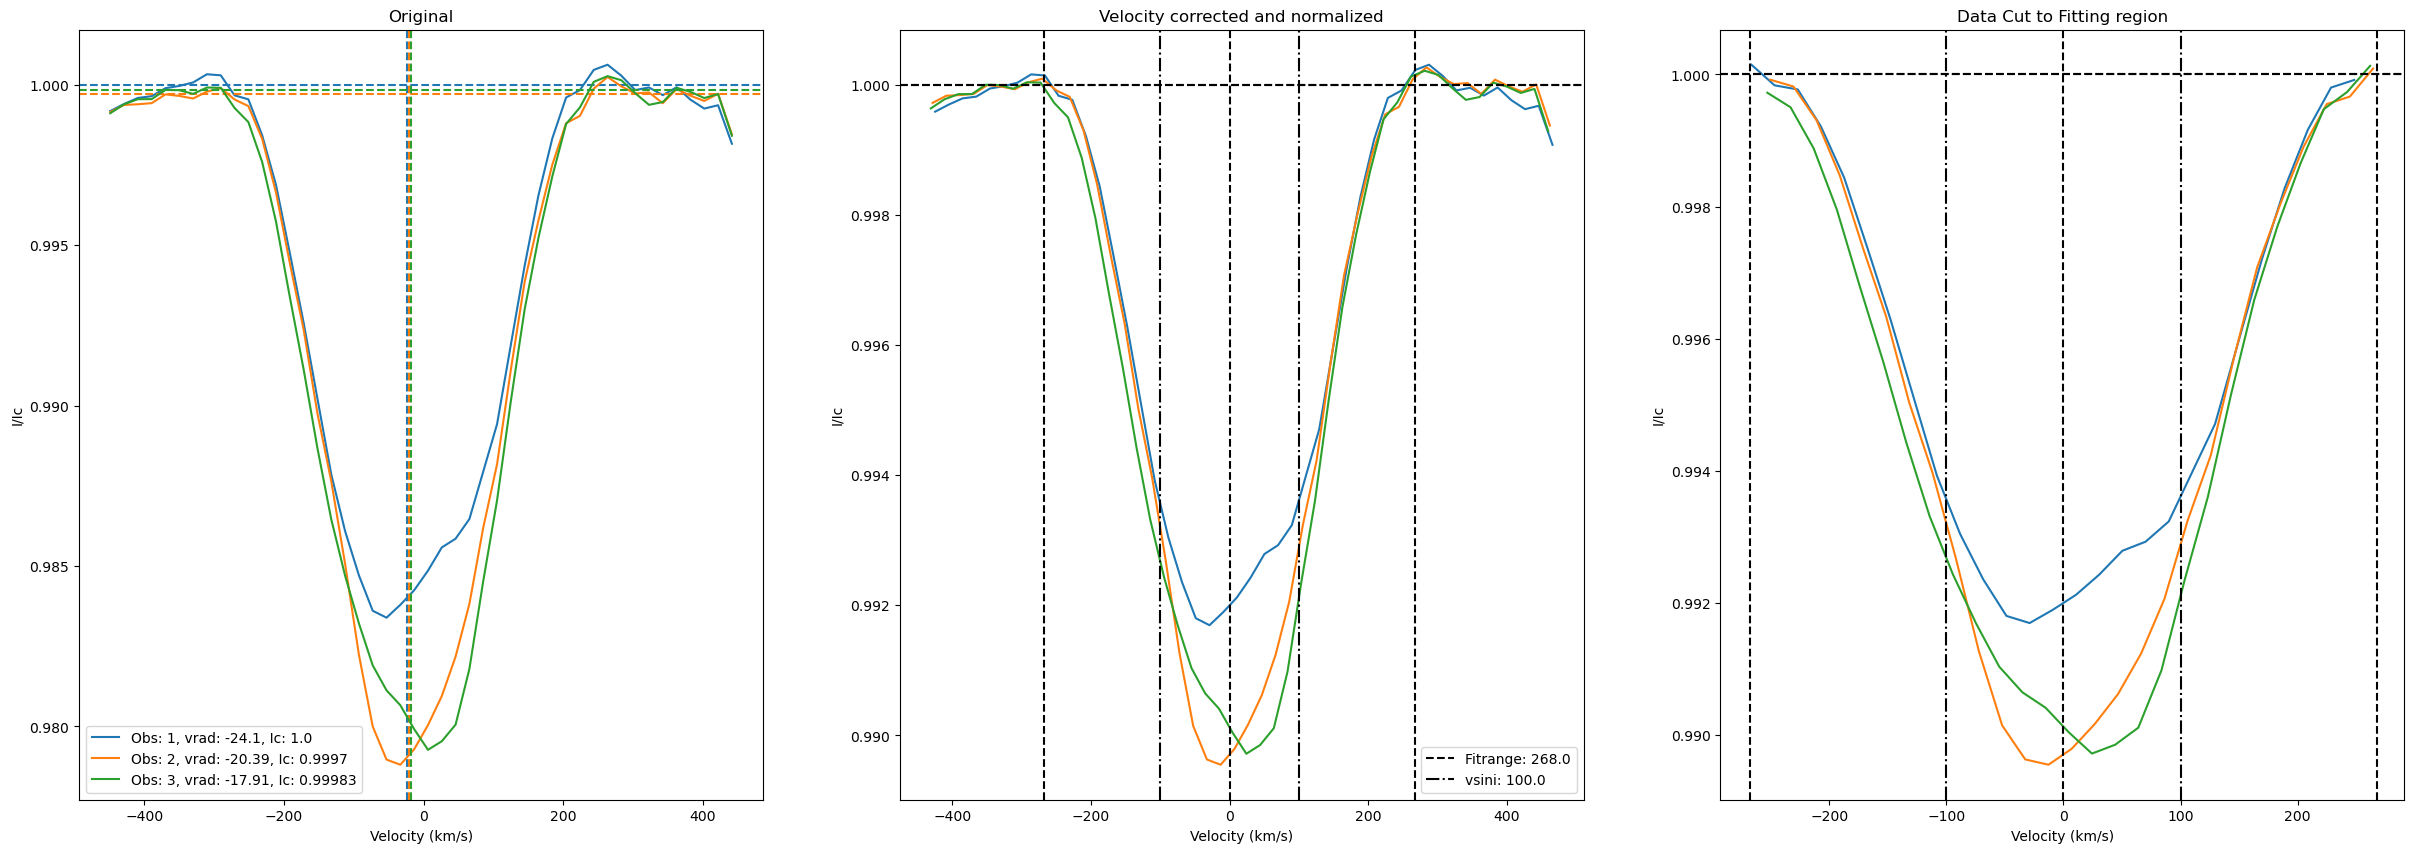

In [22]:
fig, ax = Packet.plotI()

Now that our <a href='../API/data.html#pyRaven.data.DataPacket'>`DataPacket`</a> has been created, we will write it to an h5 file for later use in the pyRaven process. 

In [23]:
Packet.write('ExampleOutput/01-DataSetup/ExamplePacket.h5')

## The structure of the output h5 file

:::{tip}
When used in the context of pyRaven, a <a href='../API/data.html#pyRaven.data.DataPacket'>`DataPacket`</a> can be read directly from file using the `packet = read_packet(Filename)` function. 
:::


In the cell below, we just illustrate the structure of the h5 file,
in case you would like to access the content directly, or in a another coding language. 
As you can see, the meta information is written directly as datasets (as opposed to attributes), because most of them are lists. 

In [24]:
path = 'ExampleOutput/01-DataSetup/ExamplePacket.h5'

# From StackOverflow: https://stackoverflow.com/questions/43371438/how-to-inspect-h5-file-in-python
def scan_hdf5(path, recursive=True, tab_step=2):
    def scan_node(g, tabs=0):
        print(' ' * tabs, g.name)
        for k, v in g.items():
            if isinstance(v, h5.Dataset):
                print(' ' * tabs + ' ' * tab_step + ' -', v.name)
            elif isinstance(v, h5.Group) and recursive:
                scan_node(v, tabs=tabs + tab_step)
    with h5.File(path, 'r') as f:
        scan_node(f)

scan_hdf5(path)

 /
   - /Ic
   /cutfit
     /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/header
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/specI
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/specN1
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/specN2
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/specSigI
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/specSigN1
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/specSigN2
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/specSigV
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/specV
       - /cutfit/hd13745_21aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/vel
     /cutfit/hd13745_22aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin
       - /cutfit/hd13745_22aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/header
       - /cutfit/hd13745_22aug12pn.s_Ic_lsd_cln_twk_reg0.2_bin/specI
       - /cutfi